# ADD PACKAGES

In [1]:
pip install librosa

In [2]:
pip install noisereduce

You should consider upgrading via the 'c:\users\kiit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\kiit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Test noise reduction algorithm

In [4]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [5]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [6]:
IPython.display.Audio(data=data, rate=rate)

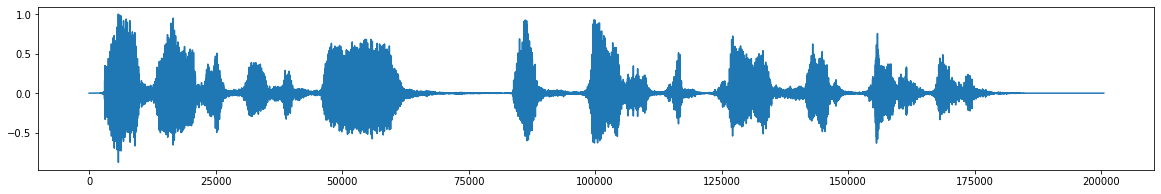

In [7]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

# add noise

In [8]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

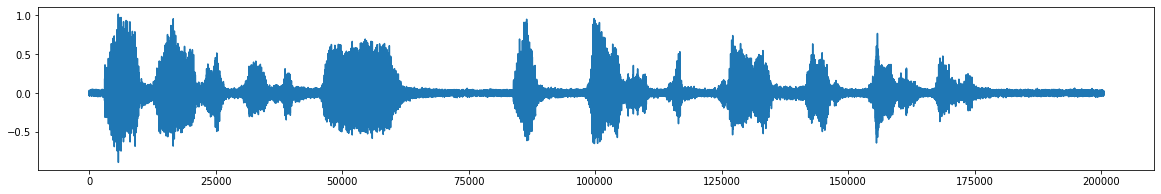

In [9]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [10]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

# Stationary remove noise

In [11]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

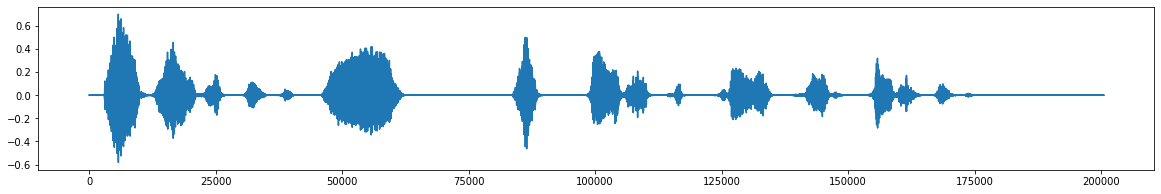

In [12]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [13]:
IPython.display.Audio(data=reduced_noise, rate=rate)

# Non-stationary noise reduction

In [14]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

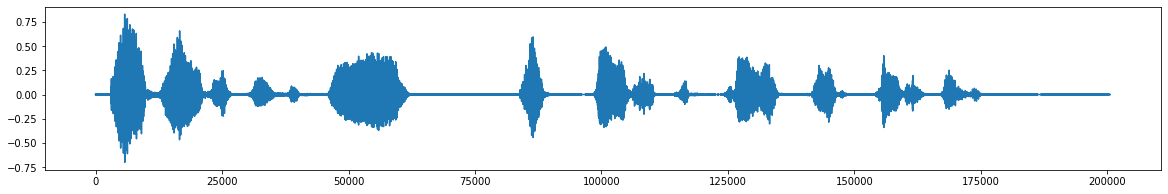

In [15]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [16]:
IPython.display.Audio(data=reduced_noise, rate=rate)

# more example

In [17]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

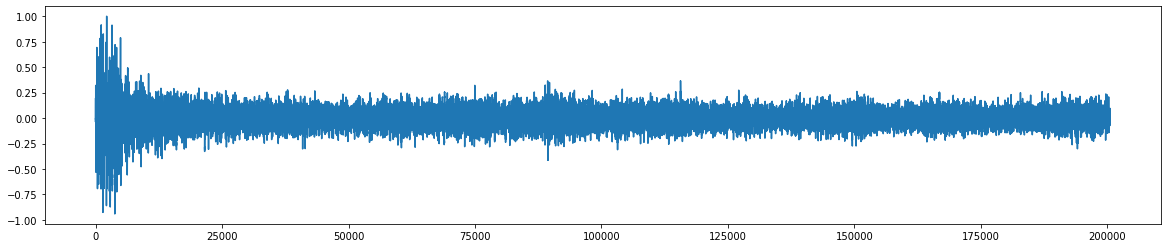

In [18]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [19]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

# add noise to data

In [20]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

# plot noisy data

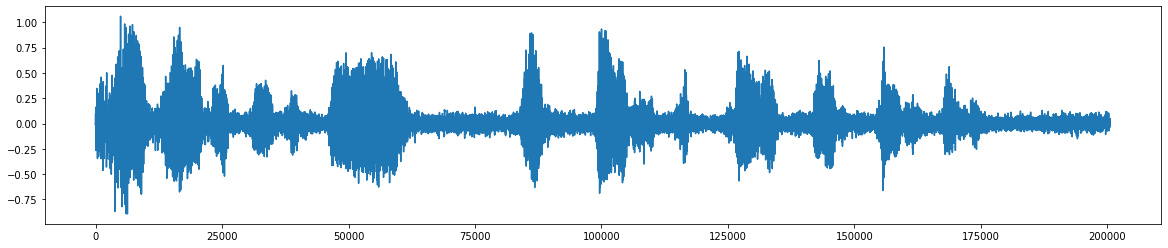

In [21]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)
IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

# Stationary remove noise

In [22]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, y_noise = noise_clip, n_std_thresh_stationary=1.5,stationary=True)

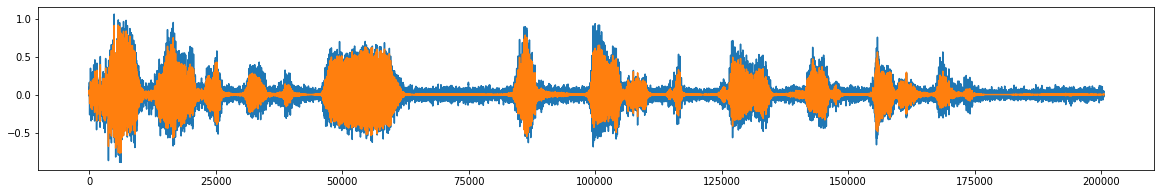

In [23]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise)

In [24]:
IPython.display.Audio(data=reduced_noise, rate=rate)

# Non-stationary noise reduction

In [25]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

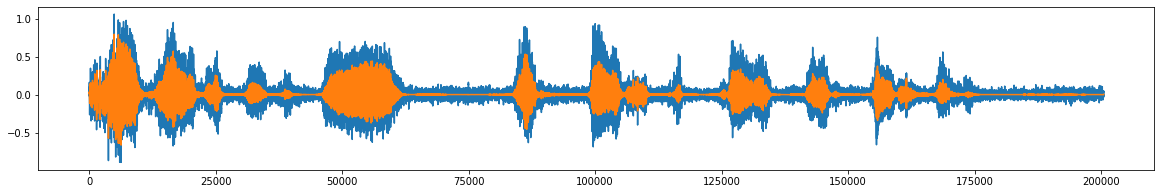

In [26]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise, alpha = 1)
IPython.display.Audio(data=reduced_noise, rate=rate)

In [27]:
IPython.display.Audio(data=reduced_noise, rate=rate)